##### Gram-Schmidt Orthogonalization
> A tutorial on gram-schmidt orthogonalization

- toc: true 
- badges: true
- comments: true
- author: Patrick Cullinane
- categories: [linear algebra]


The Gram-Schmidt process is a method for finding orthogonal vectors. One important application of this is to solve the equation $A=QR$, where each column of $A$ is a vector, each column of $Q$ are orthonormal vectors of $A$ and $R$ is an upper triangular matrix.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# function for visualizing vectors
def plotVectors(vecs, cols, alpha=1):
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha)

We start with a matrix $A$

For simplicity we can name each column as a vector

In [98]:
A = np.array([[4,2],[0,4]]); A

array([[4, 2],
       [0, 4]])

[4 0]
[2 4]


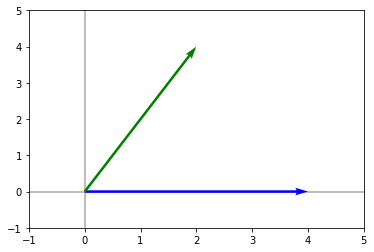

In [99]:
a = A[:,0]
b = A[:,1]

print(a)
print(b)

plotVectors([a, b],['blue','green'])
_ = plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

Our first objective is to find matrix $Q$ by taking each vector in $A$, making it orthogonal and then normalizing it. 

We make the vector orthogonal by comparing it to a previous orthogonal vector. Finally we normalize it by dividing the orthogonal vector by its length. We repeat this until we fill up our matrix $Q$.

Because the first vector has no previous vector to compare it to we accept its current direction and just normalize it.

This vector becomes $q1$

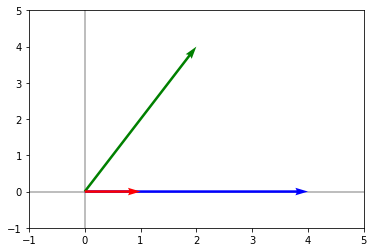

In [140]:
q1 = a/np.linalg.norm(a); q1

plotVectors([a, b, q1],['blue','green', 'red'])
_ = plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

Now we take our second vector $q2$ we need to make it orthogonal to what we already have which is $q1$. 

To do this we need to subtract from vector $b$ the projection of $b$ onto $q1$

The projection will be called $q2 prime$ and we can then normalize it to make $q2$.

[0. 4.]

0.0

[0. 1.]



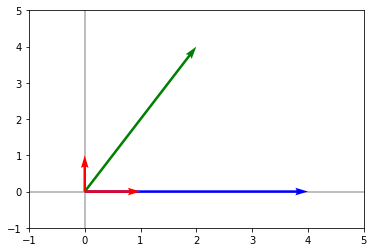

In [139]:
q2_prime = b - ((a.dot(b)/a.dot(a))*a)
print(q2_prime) # q2_prime is orthogonal to q1
print('')

# check q1 is orthogonal to q2 by doing the dot product
print(q2_prime.dot(q1)) # small enough to be orthogonal
print('')

# the next step is to normalize it - make it q2 by dividing by the norm
q2 = q2_prime/np.linalg.norm(q2_prime) 
print(q2)
print('')

plotVectors([a, b, q1, q2],['blue','green', 'red', 'red'])
_ = plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

Finally we can see the orthonormalized vectors $q1$ and $q2$

[[1. 0.]
 [0. 1.]]



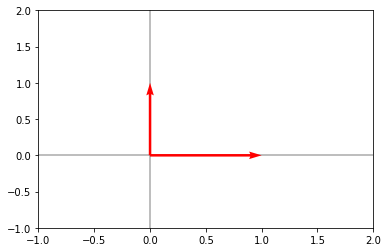

In [141]:
Q = np.concatenate([[q1],[q2]]); print(Q)
print('')

# let's look at just the orthonormal vectors we got from gram-schmidt

plotVectors([q1, q2],['red', 'red'])
_ = plt.xlim(-1, 2)
_ = plt.ylim(-1, 2)

Now we need to find the matrix $R$ to complete the equation $A \approx QR$ (in this case $A=QR$ )

Since Q is a permutation matrix the calculation will be pretty easy.

In [137]:
# the first value of vector r1 is the inner product of q1 and a

r1 = np.array([q1.dot(a), 0]); r1

array([4., 0.])

In [138]:
# the second vector r2 consists of the inner product of q1 and b, and q2 and b

r2 = np.array([q1.dot(b), q2.dot(b)]); r2

array([2., 4.])

In [133]:
R = np.concatenate([[r1],[r2]]).T; R

array([[4., 2.],
       [0., 4.]])

In [135]:
# we can check that the equation works

A == Q.dot(R)

array([[ True,  True],
       [ True,  True]])

Resources:
* https://www.youtube.com/watch?v=TRktLuAktBQ